# SC1015 MINI-PROJECT : SKINCARE RECOMMENDATION

## PRACTICAL MOTIVATIONS

Our project aims to help consumers like us make better decisions when it comes to purchasing skincare products. Of course, there are many factors to consider when it comes to purchasing cosmetic products, such as the price and the suitability of the products for our skin. This is in turn affected by the ingredients of the product, which is one of the factors we'll be exploring in our project.


## PROBLEM DEFINITION

### Detection of patterns in the data to produce a personalized recommendation system for skincare products

Is there any relationship between price and rank, within products of the same categories? (i.e. within Moisturizers, Cleansers, etc.)

Are we able to recommend similar products by analysing the ingredients used?

# DETAILED EXPLANATION
## NECESSARY IMPORTS AND INSTALLATIONS

In [1]:
# basic libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

# installing UMAP

!pip install umap-learn

import umap
import numba

# for Bokeh visualisation

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import widgetbox, column, row
from ipywidgets import interact 

# Euclidean distance

from math import dist

In [2]:
# importing the data

cosmeticsdata = pd.read_csv('cosmetics.csv')
cosmeticsdata

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


### Dataset from Kaggle
The dataset contains 1472 rows of products, containing the following columns of information:
1. Label - Product type
2. Brand - Brand of product
3. Name - Name of product
4. Price - Price of product
5. Rank - Product rating by consumers, from 0 to 5
6. Ingredients - A string of words listing out the ingredients used in the product
7. Subsequent columns - Shows the suitability of product for each skin type. 1 indicates that it is suitable, 0 indicates that it is not.

-------------------------------------------------------------------------------------------------------------------------------

## CLEANING THE DATASET
### Removing rows of missing information
The original dataset retrieved from Kaggle contains rows of data with missing information about the ingredients and so we had to remove them. 

In [3]:
# removing rows without ingredients

cosmeticsdata = cosmeticsdata[cosmeticsdata["Ingredients"].str.contains("Visit") == False]
cosmeticsdata = cosmeticsdata[cosmeticsdata["Ingredients"].str.contains("No Info") == False]
cosmeticsdata = cosmeticsdata[cosmeticsdata["Ingredients"].str.contains("NAME") == False]
cosmeticsdata = cosmeticsdata[cosmeticsdata["Ingredients"].str.contains("product package") == False]
cosmeticsdata

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0


### Changing the Indexing
Next, we also changed the numerical indexes of the dataset to the name of the products, which makes it easier for us to locate the product we want subsequently. 

In [4]:
# changing the indexes to the names of the products

cosmeticsdata = cosmeticsdata.set_index('Name')
cosmeticsdata

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
Name,,,,,,,,,,
Crème de la Mer,Moisturizer,LA MER,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
Facial Treatment Essence,Moisturizer,SK-II,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
Protini™ Polypeptide Cream,Moisturizer,DRUNK ELEPHANT,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
The Moisturizing Soft Cream,Moisturizer,LA MER,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
Your Skin But Better™ CC+™ Cream with SPF 50+,Moisturizer,IT COSMETICS,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
Daily Deflector™ Moisturizer Broad Spectrum SPF 50+,Sun protect,KATE SOMERVILLE,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
Yoghurt Nourishing Fluid Veil Face Sunscreen Broad Spectrum SPF 30,Sun protect,KORRES,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
Daily Deflector™ Waterlight Broad Spectrum SPF 50+ PA+++ Anti-Aging Sunscreen,Sun protect,KATE SOMERVILLE,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0


### Observing the categories of the various products

In [5]:
# finding the number of products for each brand

print(cosmeticsdata["Brand"].value_counts())

CLINIQUE              71
SHISEIDO              49
PETER THOMAS ROTH     46
MURAD                 46
SEPHORA COLLECTION    45
                      ..
NUFACE                 1
TOM FORD               1
SON & PARK             1
NURSE JAMIE            1
KAPLAN MD              1
Name: Brand, Length: 110, dtype: int64


In [6]:
# finding the number of categories

print(cosmeticsdata["Label"].value_counts())

Moisturizer    262
Cleanser       238
Face Mask      238
Treatment      222
Eye cream      174
Sun protect    150
Name: Label, dtype: int64


We find out that there are 6 different categories of skincare products: 

1. Moisturizer
2. Face Mask
3. Cleanser
4. Treatment
5. Eye Cream
6. Sun Protect

As the entire dataset consists of products of six different categories, we believed that it was essential for us to split them up into six separate datasets to obtain reliable results, as it would be unfair to compare products that serve different purposes. 

In [7]:
# splitting the dataset into the 6 different categories

moisturizer = cosmeticsdata[cosmeticsdata["Label"].str.contains("Moisturizer") == True]
facemask = cosmeticsdata[cosmeticsdata["Label"].str.contains("Face Mask") == True]
cleanser = cosmeticsdata[cosmeticsdata["Label"].str.contains("Cleanser") == True]
treatment = cosmeticsdata[cosmeticsdata["Label"].str.contains("Treatment") == True]
eyecream = cosmeticsdata[cosmeticsdata["Label"].str.contains("Eye cream") == True]
sunprotect = cosmeticsdata[cosmeticsdata["Label"].str.contains("Sun protect") == True]

-------------------------------------------------------------------------------------------------------------------------------

## EXPLORATORY DATA ANALYSIS - PRICE VS RANKING

We are trying to determine if there is any relationship between the prices of products and their effectiveness. We can make use the variable 'Rank' to imply consumers' satisfaction and ratings after using the product. We hypothesise that one possible result is that higher priced products are indeed more effective and hence receive better ratings, while lower priced products are indeed not as good. This implies a postive relationship between price and rank.

However, it would be unreliable to compare products from different categories against each other as certain type of products may be cheaper in general. For example, moisturizers may generally be more expensive than sun protect. Another factor to consider is that different types of products serve different purposes, so it would be unreliable to compare them with each other. Therefore, we have decided to compare the price and rankings within each category of skincare products.

,Price,Rank
Price,1.000000,-0.189539
Rank,-0.189539,1.000000


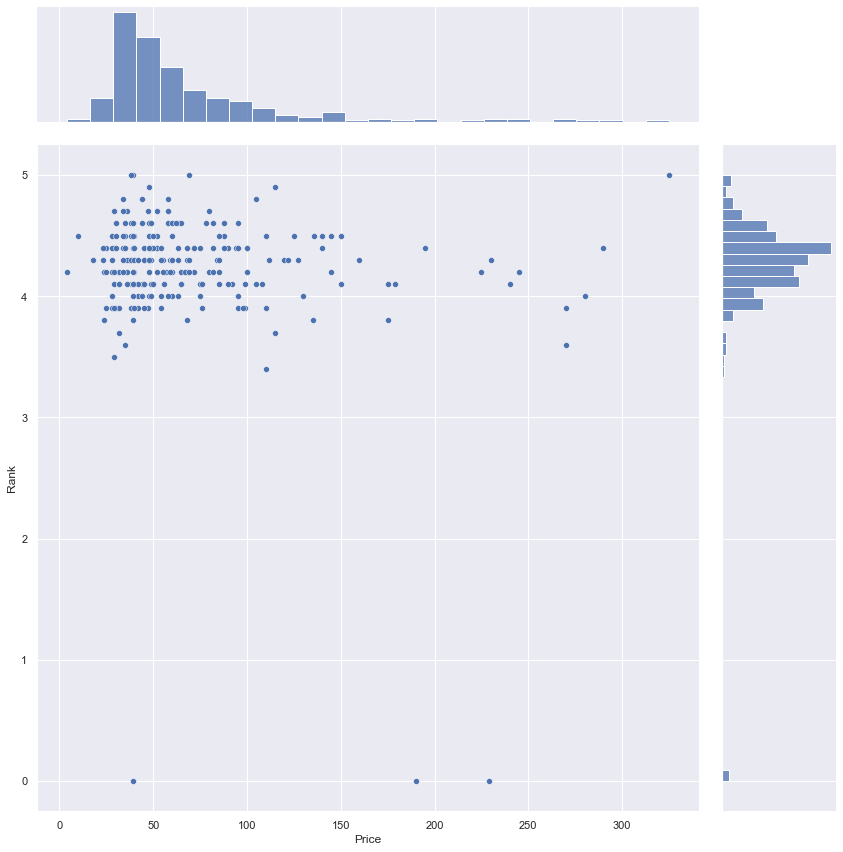

In [8]:
# extracting the two variables for moisturizer
price = pd.DataFrame(moisturizer["Price"])
rank = pd.DataFrame(moisturizer["Rank"])

# creating a joint dataframe by concatenating the two variables
priceVSrank = pd.concat([price, rank], axis = 1)

# a jointplot of the two variables in the joined dataframe
sb.jointplot(data = priceVSrank, x = "Price", y = "Rank", height = 12)

# calculating the correlation between the two variables
priceVSrank.corr()

,Price,Rank
Price,1.00000,-0.03379
Rank,-0.03379,1.00000


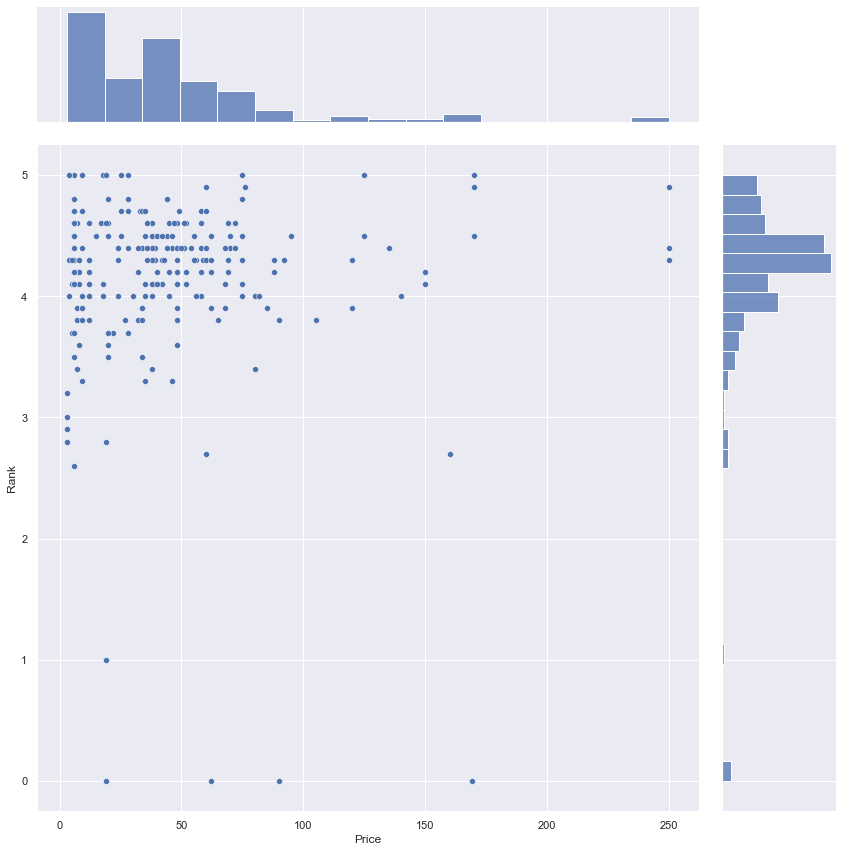

In [9]:
# extracting the two variables for face mask
price = pd.DataFrame(facemask["Price"])
rank = pd.DataFrame(facemask["Rank"])

# creating a joint dataframe by concatenating the two variables
priceVSrank = pd.concat([price, rank], axis = 1)

# a jointplot of the two variables in the joined dataframe
sb.jointplot(data = priceVSrank, x = "Price", y = "Rank", height = 12)

# calculating the correlation between the two variables
priceVSrank.corr()

,Price,Rank
Price,1.000000,-0.002363
Rank,-0.002363,1.000000


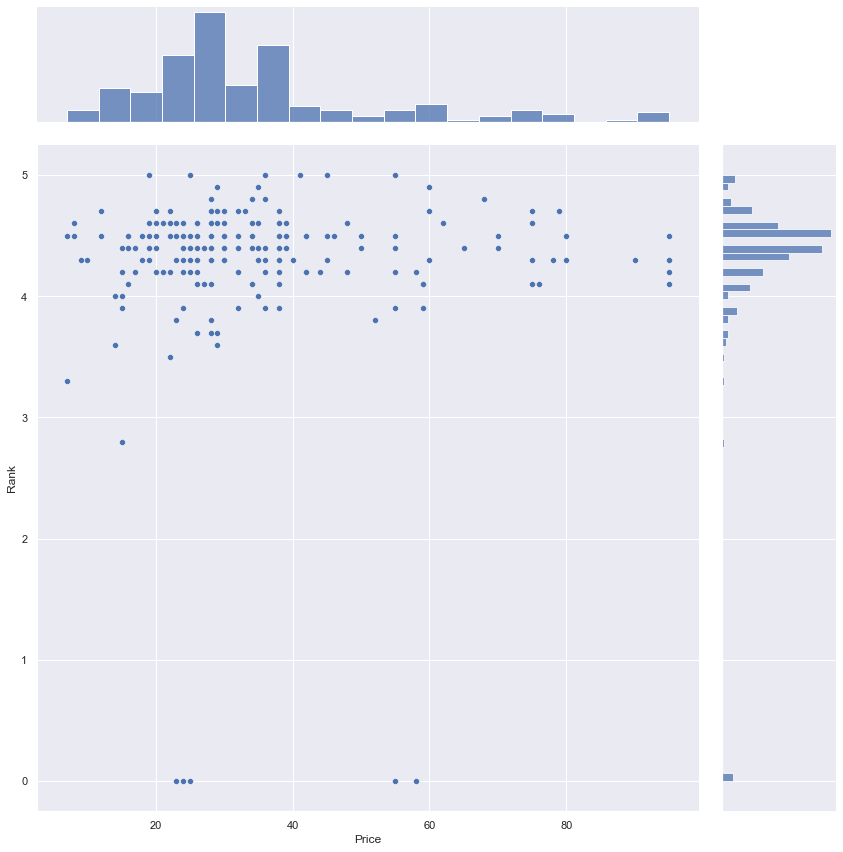

In [10]:
# extracting the two variables for cleanser
price = pd.DataFrame(cleanser["Price"])
rank = pd.DataFrame(cleanser["Rank"])

# creating a joint dataframe by concatenating the two variables
priceVSrank = pd.concat([price, rank], axis = 1)

# a jointplot of the two variables in the joined dataframe
sb.jointplot(data = priceVSrank, x = "Price", y = "Rank", height = 12)

# calculating the correlation between the two variables
priceVSrank.corr()

,Price,Rank
Price,1.000000,0.065344
Rank,0.065344,1.000000


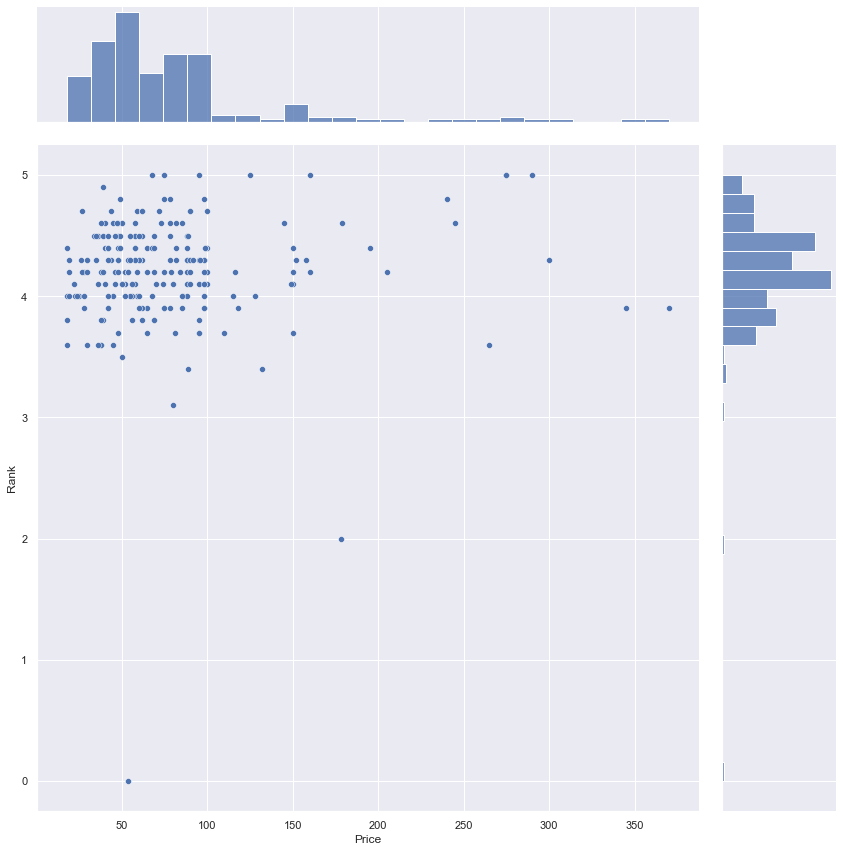

In [11]:
# extracting the two variables for treatment
price = pd.DataFrame(treatment["Price"])
rank = pd.DataFrame(treatment["Rank"])

# creating a joint dataframe by concatenating the two variables
priceVSrank = pd.concat([price, rank], axis = 1)

# a jointplot of the two variables in the joined dataframe
sb.jointplot(data = priceVSrank, x = "Price", y = "Rank", height = 12)

# calculating the correlation between the two variables
priceVSrank.corr()

,Price,Rank
Price,1.000000,0.133562
Rank,0.133562,1.000000


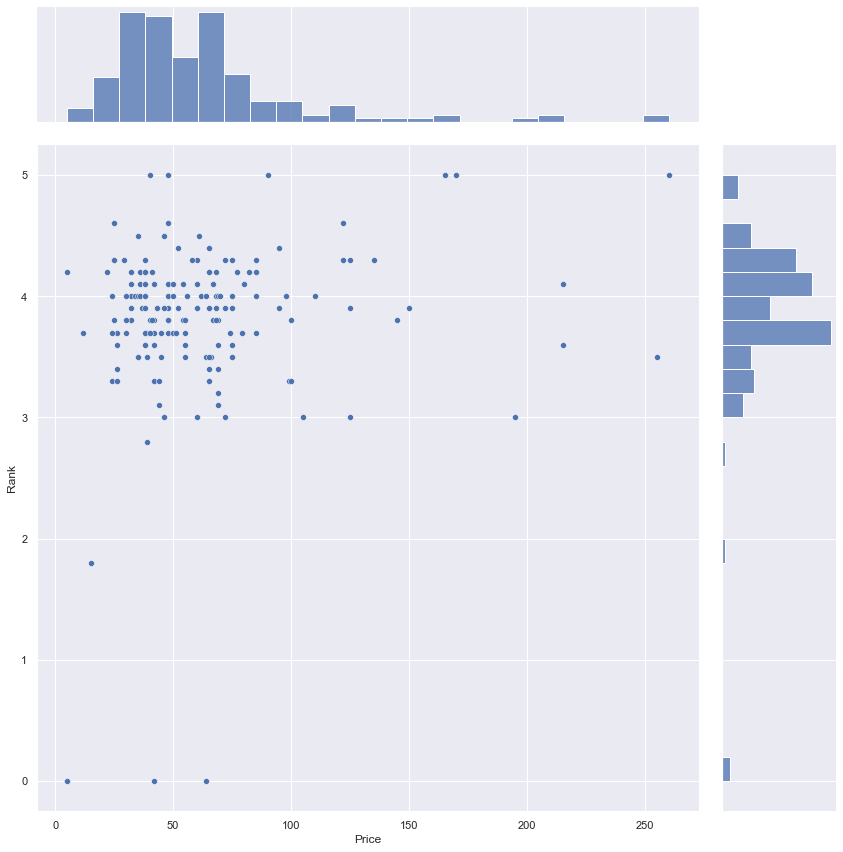

In [12]:
# extracting the two variables for eye cream
price = pd.DataFrame(eyecream["Price"])
rank = pd.DataFrame(eyecream["Rank"])

# creating a joint dataframe by concatenating the two variables
priceVSrank = pd.concat([price, rank], axis = 1)

# a jointplot of the two variables in the joined dataframe
sb.jointplot(data = priceVSrank, x = "Price", y = "Rank", height = 12)

# calculating the correlation between the two variables
priceVSrank.corr()

,Price,Rank
Price,1.000000,-0.015988
Rank,-0.015988,1.000000


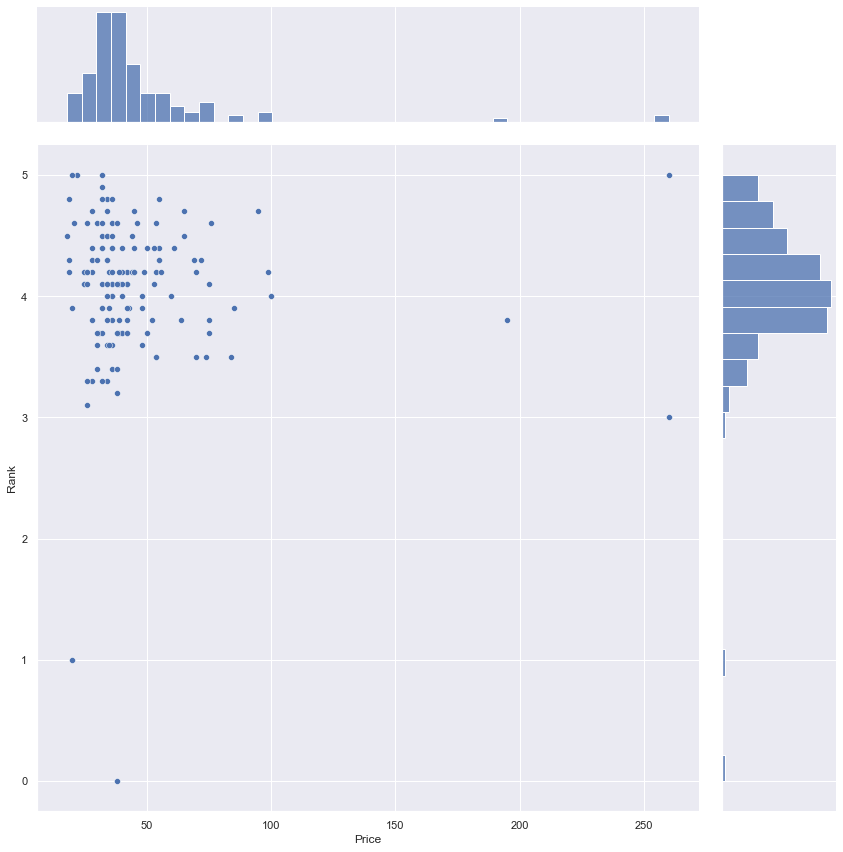

In [13]:
# extracting the two variables for sun protect
price = pd.DataFrame(sunprotect["Price"])
rank = pd.DataFrame(sunprotect["Rank"])

# creating a joint dataframe by concatenating the two variables
priceVSrank = pd.concat([price, rank], axis = 1)

# a jointplot of the two variables in the joined dataframe
sb.jointplot(data = priceVSrank, x = "Price", y = "Rank", height = 12)

# calculating the correlation between the two variables
priceVSrank.corr()

### Remarks for EDA
We calculated their correlation for each product category and here are our results as shown above. As seen, we can conclude that there is hardly any relationship between the two variables, with the lowest correlation magnitude being as low as 0.002 for the cleanser category. 

-------------------------------------------------------------------------------------------------------------------------------

## MACHINE LEARNING - RECOMMENDING PRODUCTS BASED ON SIMILAR INGREDIENTS

Whenever we are looking for new skincare products, we are always unsure of which products to try and end up relying on recommendations from others. But we often neglect the fact that everyone's skin type is different, which explains why many skincare products that work for others may not work for you. This is why we have decided to come up with a recommendation system that relies on the ingredients of each product to identify the products that are the most similar to our favourite ones that have been working for us. Hopefully, this would lead to a better selection of skincare products that suit our personal skin type best.

We made use of natural language processing and dimensionality reduction techniques to analyse the similarities between ingredients used, since they are text data.

### Filtering out data that are cleansers for oily skin
Since the dataset includes data which shows the products that are suitable for each skin type, we can take advantage of that to make our recommendation system more accurate by narrowing down the scope. In this explanation, we will be exploring just one combination as an example: cleanser for oily skin. For an interactive recommendation system that can provide recommendations for other combinations of product type and skin type, please refer to the next jupyter notebook file found on github.

In [14]:
# filtering out data that are cleansers for oily skin

dataset1 = cosmeticsdata[cosmeticsdata['Label'] == 'Cleanser'][cosmeticsdata['Oily'] == 1]
dataset1

<ipython-input-14-335d12f2c618>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset1 = cosmeticsdata[cosmeticsdata['Label'] == 'Cleanser'][cosmeticsdata['Oily'] == 1]


,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
Name,,,,,,,,,,
T.L.C. Sukari Babyfacial™,Cleanser,DRUNK ELEPHANT,80,4.5,"Water, Glycolic Acid, Hydroxyethyl Acrylate/So...",1,1,1,1,0
T.L.C. Framboos™ Glycolic Night Serum,Cleanser,DRUNK ELEPHANT,90,4.3,"Water, Glycolic Acid, Butylene Glycol, Glyceri...",1,1,1,1,0
Green Clean Makeup Meltaway Cleansing Balm with Echinacea GreenEnvy™,Cleanser,FARMACY,34,4.6,"Cetyl Ethylhexanoate, Caprylic/Capric Triglyce...",1,1,1,1,1
Purity Made Simple Cleanser,Cleanser,PHILOSOPHY,24,4.5,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",1,1,1,1,1
The Rice Polish Foaming Enzyme Powder,Cleanser,TATCHA,65,4.4,"Microcrystalline Cellulose, Oryza Sativa (Rice...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
Rosa Centifolia™ No.1 Purity Cleansing Balm,Cleanser,REN CLEAN SKINCARE,32,4.2,"Prunus Amygdalus Dulcis (Sweet Almond) Oil, Ce...",1,1,1,1,1
Blue Herbal Acne Cleanser Treatment,Cleanser,KIEHL'S SINCE 1851,22,3.5,"Water, Coco-Glucoside, Propylene Glycol, Ammon...",1,0,0,1,0
Pore Refining Detox Double Cleanse,Cleanser,ERNO LASZLO,55,5.0,"Water, Propanediol, Sodium C14-16 Olefin Sulfo...",1,1,1,1,1


### Lexical Analysis (Tokenization)
It is the process of converting a sequence of characters into a sequence of tokens. The ingredients in the original dataset are in a long string of words. Hence, we need to split them up into unique unrepeated tokens and add them into a dictionary. This helps us identify each ingredient for subsequent data processing.

In [15]:
# tokenisation of the ingredients list 

index = 0
ingredient_dict = {}
corpus = []

for i in range(len(dataset1)):
    ingredients = dataset1['Ingredients'][i]
    ingredients_lower = ingredients.lower()        # change all to lower case
    tokens = ingredients_lower.split(', ')         # split up the ingredients from the string
    corpus.append(tokens)
    
    for ingredient in tokens:
        if ingredient not in ingredient_dict:      # prevents duplication
            ingredient_dict[ingredient] = index
            index += 1

### One-hot Encoding
One-hot encoding is often used in deep learning to convert categorical data variables to numerical data for machines to process for learning. To facilitate this process, we create a matrix with the rows representing the products and the columns representing the ingredients. This function goes through each ingredient of every product sequentially and fills the matrix with either a zero or one, depending on whether the ingredient is present in the product. At the end, we obtain a matrix of ingredients and products.

In [16]:
# maxtrix that is filled with binary values 
# to check if ingredient is present or absent
# if present, it will be 1
# if absent, it will be 0
 
M = len(dataset1)           # number of products
N = len(ingredient_dict)    # number of ingredients

# initialise matrix with 0s

matrix = np.zeros(shape = (M, N))

# filling up the matrix

def one_hot_encoder(tokens):
    x = np.zeros(N)
    
    for ingredient in tokens:
        index = ingredient_dict[ingredient]
        x[index] = 1
    return x

i = 0

for tokens in corpus:
    matrix[i, :] = one_hot_encoder(tokens)
    i += 1
    
matrix

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.]])

### Dimensionality Reduction using UMAP
As our matrix has a dimension of 147 by 16, it is difficult to visualise the data due to the large number of variables. Hence, we use dimensionality reduction, which is an unsupervised machine learning technique due to the absence of output variables for prediction. There are various dimensionality reduction techniques. 

In our case, we used Uniform Manifold Approximation and Projection (UMAP). UMAP is a machine-learning algorithm to predict a manifold.  A search region is expanded around every point until a neighbouring point is met, creating connections to form a manifold. To artificially distribute the data uniformly, larger search regions (known as fuzzy) in lower-density areas and smaller ones in larger-density areas are created. The data points are then placed onto this new manifold in 2 new dimensions. The algorithm then iteratively shuffles this manifold until the distances between the points are similar to that of the original. Finally, new data points can be projected onto this manifold as UMAP has learnt the lower-dimensional manifold.

When using UMAP, we need to decide on the values of our hyperparameters.
1. n_components
2. min_dist
3. n_neighbours

#### n_components
It defines the dimensionality of the reduced dimension space we will be embedding the data into.

#### min_dist
This parameter controls how tightly UMAP packs the points. It is the minimum distance that points are allowed to be apart in the low dimensional representation and its value ranges from 0 to 1. Lower values result in clumpier embeddings.

#### n_neighbours
It controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighbourhood that UMAP will look at when attempting to learn the manifold structure of the data. This means that low values focuses more on local structure while higher values focuses more on global structure.

#### Decision of hyperparameters
In our case, we have chosen n components to be 2 since we are reducing our matrix to a 2-dimensional structure for easy visualisation. As for the min distance, we chose a larger value to prevent the points from clustering too closely. N neighbours is set to a smaller value as the data used to create our UMAP has already been filtered so we can afford to focus on the finer details and preserve more of the local structure. We chose n neighbours to be 5 since the aim of our recommendation system is to recommend the 5 most similar products.

In [17]:
# dimensionality reduction with UMAP

umap_data = umap.UMAP(n_components = 2, min_dist = 0.7, n_neighbors = 5, random_state = 1).fit_transform(matrix)

# adding 2 new columns X and Y to the dataset

dataset1['X'] = umap_data[:, 0]
dataset1['Y'] = umap_data[:, 1]

dataset1

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
Name,,,,,,,,,,,,
T.L.C. Sukari Babyfacial™,Cleanser,DRUNK ELEPHANT,80,4.5,"Water, Glycolic Acid, Hydroxyethyl Acrylate/So...",1,1,1,1,0,16.978378,12.727462
T.L.C. Framboos™ Glycolic Night Serum,Cleanser,DRUNK ELEPHANT,90,4.3,"Water, Glycolic Acid, Butylene Glycol, Glyceri...",1,1,1,1,0,19.748329,7.026492
Green Clean Makeup Meltaway Cleansing Balm with Echinacea GreenEnvy™,Cleanser,FARMACY,34,4.6,"Cetyl Ethylhexanoate, Caprylic/Capric Triglyce...",1,1,1,1,1,18.753494,8.462796
Purity Made Simple Cleanser,Cleanser,PHILOSOPHY,24,4.5,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",1,1,1,1,1,20.069347,8.610117
The Rice Polish Foaming Enzyme Powder,Cleanser,TATCHA,65,4.4,"Microcrystalline Cellulose, Oryza Sativa (Rice...",1,1,1,1,1,19.378677,11.805211
...,...,...,...,...,...,...,...,...,...,...,...,...
Rosa Centifolia™ No.1 Purity Cleansing Balm,Cleanser,REN CLEAN SKINCARE,32,4.2,"Prunus Amygdalus Dulcis (Sweet Almond) Oil, Ce...",1,1,1,1,1,16.863363,11.474477
Blue Herbal Acne Cleanser Treatment,Cleanser,KIEHL'S SINCE 1851,22,3.5,"Water, Coco-Glucoside, Propylene Glycol, Ammon...",1,0,0,1,0,19.095127,11.047445
Pore Refining Detox Double Cleanse,Cleanser,ERNO LASZLO,55,5.0,"Water, Propanediol, Sodium C14-16 Olefin Sulfo...",1,1,1,1,1,16.651133,11.093803


#### Why UMAP?
There are multiple dimensionality reduction methods, we narrowed it down to 2 of the more commonly-used methods – UMAP and t-SNE since we need to detect non-linear patterns. Between UMAP and t-SNE, UMAP has comparatively more advantages. It can make predictions on new data, preserve both local and global structure of the data points and has a higher time-efficiency. Hence, we chose UMAP.

Below, you can see an alternative method for dimensionality reduction with t-SNE. It is not run due to the aforementioned reasons.

In [18]:
# alternative method

# dimensionality reduction with t-SNE

# tSNE_data = TSNE(n_components = 2, learning_rate = 200).fit_transform(matrix)

# dataset1['X'] = tSNE_data[:, 0]
# dataset1['Y'] = tSNE_data[:, 1]

# dataset1

-------------------------------------------------------------------------------------------------------------------------------

## ANALYTIC VISUALISATION - USING BOKEH FOR GRAPH PLOTTING
Based on the UMAP values obtained earlier, we plotted a bokeh graph to visualise the data easily and find similarities between the products. Running the code should display the Bokeh graph in a new tab.

In [19]:
# creating a Bokeh plot

plot = figure(width = 500, height = 500, 
              x_axis_label = 'UMAP 1',
              y_axis_label = 'UMAP 2')

plot.circle(x = 'X', y = 'Y', source = ColumnDataSource(dataset1),
            size = 10, color = "olive", alpha = 1)

plot.background_fill_color = "beige"
plot.background_fill_alpha = 0.5

# adding a hover tool

hover = HoverTool(tooltips = [('Product', '@Name'),
                              ('Brand', '@Brand'), 
                              ('Price', '$@Price'), 
                              ('Rank', '@Rank')])

plot.add_tools(hover)

# displaying the Bokeh diagram

show(plot, notebook_handle = True)

#### Reading the plotted Bokeh graph
There are various points on the graph. Each points corresponds to and displays information on cleasers for oily skin. Then, what does its two dimensional values on the X and Y axis mean?

The axes of a UMAP plot aren’t easily interpretable in terms of the original data. UMAP is a visualizing technique to plot high-dimensional data in a low-dimensional space. Therefore, it’s not desirable to interpret a UMAP plot quantitatively.

Hence, we should apply some statistical inference techniques so we can gain insights from the Bokeh graph plotted.

-------------------------------------------------------------------------------------------------------------------------------

## STATISTICAL INFERENCE - COMPARING ITEMS BY EUCLIDEAN DISTANCE

We used Euclidean distance to find the points closest to the point of our choice. As an example, we have selected Greek Yoghurt Foaming Cream Cleanser to be our chosen item. We calculate the distance between the point of our chosen item and the points of other products, then find the products with the 5 smallest distances.

In [20]:
dataset1['Distance'] = 0.0

# using Greek Yoghurt Foaming Cream Cleanser as an example

myItem = dataset1.loc[['Greek Yoghurt Foaming Cream Cleanser']]

point1 = np.array([myItem['X'], myItem['Y']])
point1

array([[19.343813],
       [11.351343]], dtype=float32)

In [21]:
# other items

for i in range(len(dataset1)):
    point2 = np.array([dataset1['X'][i], dataset1['Y'][i]])
    dataset1.Distance[i] = dist(point1, point2)

<ipython-input-21-9d137dfa2f42>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1.Distance[i] = dist(point1, point2)


These 5 products are the most similar to the consumer’s choice of product.

In [22]:
# sorting data in ascending order

dataset1 = dataset1.sort_values('Distance')
dataset1.head(6)

,Label,Brand,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,Distance
Name,,,,,,,,,,,,,
Greek Yoghurt Foaming Cream Cleanser,Cleanser,KORRES,26,4.6,"Water, Sodium Cocoyl Isethionate, Cocobetaine,...",1,1,1,1,1,19.343813,11.351343,0.000000
The Deep Cleanse,Cleanser,TATCHA,38,4.4,* Hadasei-3,1,0,1,1,1,19.039803,11.565933,0.372117
Blue Herbal Acne Cleanser Treatment,Cleanser,KIEHL'S SINCE 1851,22,3.5,"Water, Coco-Glucoside, Propylene Glycol, Ammon...",1,0,0,1,0,19.095127,11.047445,0.392681
The Rice Polish Foaming Enzyme Powder,Cleanser,TATCHA,65,4.4,"Microcrystalline Cellulose, Oryza Sativa (Rice...",1,1,1,1,1,19.378677,11.805211,0.455205
White Lucent Luminizing Infuser,Cleanser,SHISEIDO,52,3.8,"Water, Dipropylene Glycol, Glycerin, Tranexami...",1,1,1,1,0,19.427225,10.781136,0.576276
Acne Solutions Cleansing Foam,Cleanser,CLINIQUE,21,4.2,"Water , Glycerin , Butylene Glycol , Sodium Me...",1,1,1,1,0,19.853718,10.961841,0.641650


Hence, from the above table, we can find the 5 products that are most similar to Greek Yoghurt Foaming Cream Cleanser.

-------------------------------------------------------------------------------------------------------------------------------

## CONCLUSIONS
So, does price really determine the quality of a product? Perhaps it doesn't.

We often have the misconception that expensive products are better while cheaper products are likely to be ineffective. Therefore, in this project, we have analyzed whether there is in fact any relationship between skincare products and their prices. Another problem we often face is figuring out which products to try. Whenever we are looking for new skincare products, we are always unsure of which products to try and end up relying on recommendations from others. But we neglect the fact that everyone's skin type is different, which explains why many skincare products that work for others may not work for us. 

After analysis, we have learnt that there is minimal correlation between products and their prices. This means that price does not guarantee quality and consumers should not be swayed by the price when purchasing skincare products in the future. We also came up with a recommendation system that outputs the products most similar to the consumer’s choice of product, so if there is a certain product that a consumer likes, he or she can try out other similar products. For an more interactive system (with less explanations), please refer to the next jupyter notebook file found on github.

## REFELCTIONS

### Stochastic Nature of UMAP (and several other dimensional reduction techniques)
There is a degree of randomness when running the code on multiple occasions. This makes it hard to reproduce the exact same results. This is because the process involves the inadvertent distortion of data points to fit into lower dimensions. The iteration process of fitting the points onto a manifold is also stochastic and random in nature. However, this may be seen as a good thing as it results in faster execution speeds.

The best we could do to minimise the variations in results was to finetune the hyperparameters until we got the optimal values. One recommendation we have is to check the accuracy of UMAP to help us finetune the parameters better. (click)(click) By calculating the trustworthiness and continuity, we can determine how well the data’s structure is preserved after dimensionality reduction, with 0 being the worst and 1 being the best. 
### Learning Points and Takeaways
We found the project meaningful and had many key takeaways:
1. Collaborating using Google CoLab and GitHub
2. Handling data and extracting key information relevant to the problem definition
3. NLP models
4. Usage of lexical analysis (tokenisation) to better extract relevant keywords (in our case, ingredients for skincare products)
5. Representing data in a DTM, which has a high dimension, using one-hot encoding
6. Using dimensionality reduction algorithms, such as Principal Component Analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE), and UMAP, so as to be able to visualise key information
7. limitations of dimensionality reduction algorithms
8. Using bokeh to visualise data
9. Finding similarities